In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['text.usetex'] = True

# Practicum Wet van Snellius

## Belangrijke punten

* Omzetten van graden naar radialen in excel
* Waarom de sinus van de hoeken uitgezet worden.
* Lineaire regressie
* Bepaling van de fout in richtingscoëfficient (omrekenen van statistische naar absolute fout)
* Zien dat de richtingscoëfficient van de grafiek in wet van Snellius staat.

Zelf vind ik het tweede deel (bepaling van de planparallele verschuiving niet zo belangrijk)

## Plan van aanpak tijdens practicum

Vooraf: Met studenten kort een tekening maken om breking te illustreren.

Tussendoor: Lineaire regressie kort bespreken. Belangrijke punten hier zijn:
* Waarom zet ik de sinus uit en niet alleen de hoek? (lineairisatie)
* Wat is de richtingscoëfficient? (verband met wet van Snellius)
* Wat stelt de fout in de richtingscoëfficient voor? (zien dat de fout in de brekingsindex gelijk is aan fout in de richtingscoëfficient).

## Fouten die studenten kunnen maken

* De optische-as van de platbolle lens verkeerd niet meeverschuiven als de platbolle lens geroteerd wordt.
* Vergeten de sinus tegen elkaar uit te zetten.
* x- en y-data in grafiek verwisselen (hoeft geen probleem te zijn als ze zien dat je in de wet van Snellius $1/rc$ in moet zetten).


## Deel 1: Breking platbolle lens

* Grenshoek berekenen
* Bepalen brekingshoek $\phi_2$
* plot $sin(\phi_1)$ tegen $sin(\phi_2)$
* lineaire regressie

## Bepaling grenshoek

In [8]:
n1 = 1.00029 # Brekingsindex lucht
n2 = 1.49  # brekingsindex plexiglas

# Grenshoek
phi_g = np.arcsin(n1/n2)

In [9]:
np.degrees(phi_g)

42.170228639439344

## Fictieve meting

* 10 metingen van $\phi_1$ tussen 0 en 80 $^\circ$.
* met brekingsindex theoretische $\phi_2$ berekenen
* Meting fictief creeëren (random)

Meest voorkomende fout bij deze meting is dat de platbolle lens geroteerd wordt om de invalshoek te veranderen. Hierbij moet eraan gedacht worden de optische-as mee te roteren, anders volgt er naderhand geen lineaire grafiek.

In [19]:
# Bepaling phi2

phi_1 = np.linspace(0.0, 80, 9)
phi_1rad = np.deg2rad(phi_1)

phi_2rad = np.arcsin(n1/n2 * np.sin(phi_1rad))
phi_2 = np.degrees(phi_2rad)


# phi2 random
phi_2m = [phi_2[i] * np.random.uniform(0.97, 1.03) for i in range(len(phi_2))]

In [20]:
print(phi_1.T)
print(phi_2m)

[ 0. 10. 20. 30. 40. 50. 60. 70. 80.]
[0.0, 6.617592885372499, 13.585384715643603, 19.078228387848274, 25.22401579971575, 31.770483052833402, 34.81596613746937, 38.7786321898314, 42.38263591112108]


## Grafiek uitzetten

Fouten:

* de sinus wordt niet vooraf berekend, waardoor de grafiek niet lineair is.
* Hoeken worden verkeerdom uitgezet waardoor de brekingsindex omgekeerd proportionaal wordt met de richtingscoëfficient.

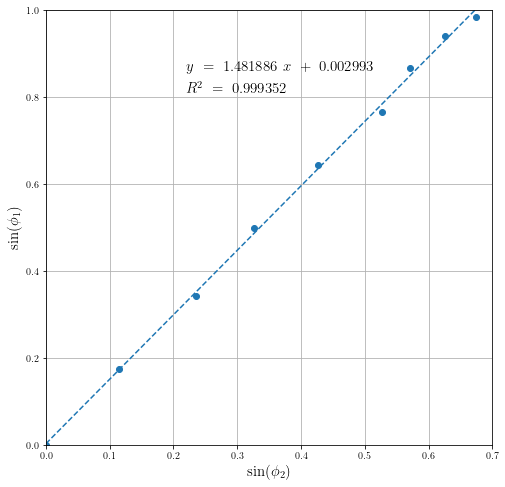

In [25]:
fig1 = plt.figure(figsize=(8,8))
ax1 = fig1.add_subplot(111)

# ax1.scatter(np.sin(np.deg2rad(phi_2)), np.sin(np.deg2rad(phi_1)), label='theoretisch')
ax1.scatter(np.sin(np.deg2rad(phi_2m)), np.sin(np.deg2rad(phi_1)), label='meting')

ax1.set_xlabel(r'$\sin(\phi_2)$', fontsize=15)
ax1.set_ylabel(r'$\sin(\phi_1)$', fontsize=15)

# lineaire regressie
slope, intercept, r, p, stat_err = stats.linregress(np.sin(np.deg2rad(phi_2m)), np.sin(np.deg2rad(phi_1)) )
model = slope*np.sin(np.deg2rad(phi_1)) + intercept

ax1.plot(np.sin(np.deg2rad(phi_1)), model, '--')
ax1.text(0.22, 0.86, r'$y\ =\ %3f\ x\ +\ %3f$' % (slope, intercept), fontsize=15)
ax1.text(0.22, 0.81, r'$R^2\ =\ %f$' % r, fontsize=15)

ax1.set_xlim([0, 0.7])
ax1.set_ylim([0,1])

# ax1.legend()
ax1.grid(True)

In [11]:
drc = 2.306 * stat_err
drc

0.040756459613461006

# Hier een voorbeeld wanneer de sinus niet berekend wordt.

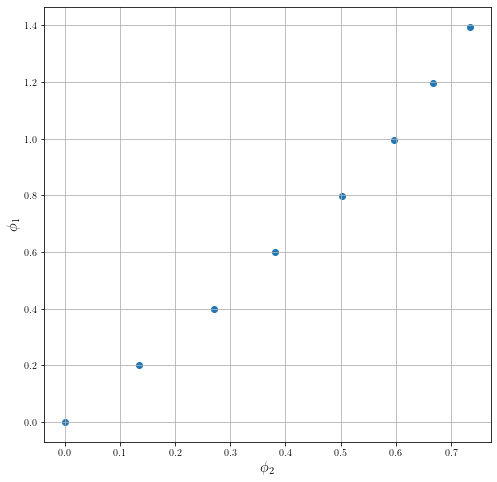

In [12]:
fig2 = plt.figure(figsize=(8,8))
ax2 = fig2.add_subplot(111)

# ax1.scatter(np.sin(np.deg2rad(phi_2)), np.sin(np.deg2rad(phi_1)), label='theoretisch')
ax2.scatter(np.deg2rad(phi_2m), np.deg2rad(phi_1), label='meting')

ax2.set_xlabel(r'$\phi_2$', fontsize=15)
ax2.set_ylabel(r'$\phi_1$', fontsize=15)

# ax1.legend()
ax2.grid(True)

## Berekining brekingsindex
Studenten moeten zien dat de richtingscoëfficient proportioneel is met de brekingsindex. Dit wordt uitgelegd bij tussenbespreking van lineaire regressie.

Uit wet van Snellius:

$$ n_1\ \cdot\ \sin(\phi_1)\ =\ n_2\ \cdot\ \sin(\phi_2)$$

Omzetten naar $n_2$:

$$ n_2\ =\ n_1\ \frac{\sin(\phi_1)}{\sin(\phi_2)}\ =\ n_2\ \cdot\ rc$$ 

fout in $n_2$:

$$n_2\ =\ \Delta rc$$

In [13]:
n_2b = n1 * slope
dn2 = drc

print(n_2b, drc)

1.487045429150779 0.040756459613461006


## Deel 2: Verschuiving bepalen

Dit deel is leuk om te doen, maar voor mij niet heel belangrijk. Het enige wat voor mij belangrijk is, is:

* Waar zouden de onnauwkeurigheden vandaan kunnen komen?
* Hoe zouden deze verbeterd kunnen worden?
* Welke methode is het beste om de fout te bepalen (fout hoeven ze niet te bepalen, want de min-max methode hierop toepassen is veel te lastig).

Ik heb hier ook het Python script weggelaten, want die is niet zo interessant.